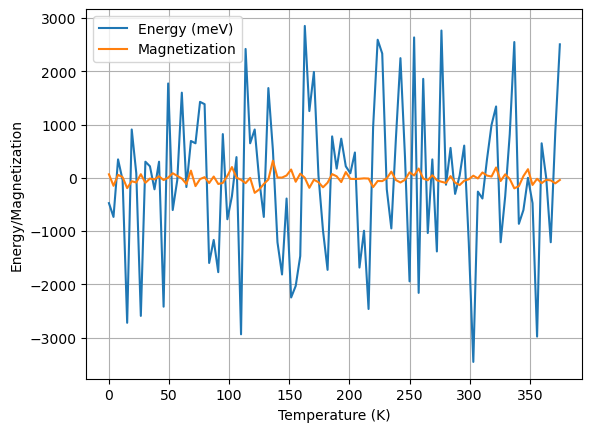

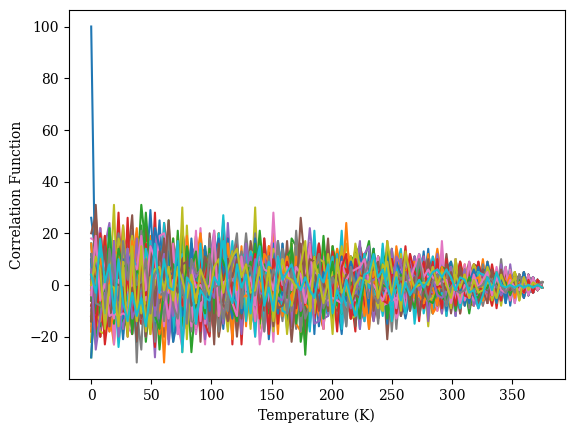

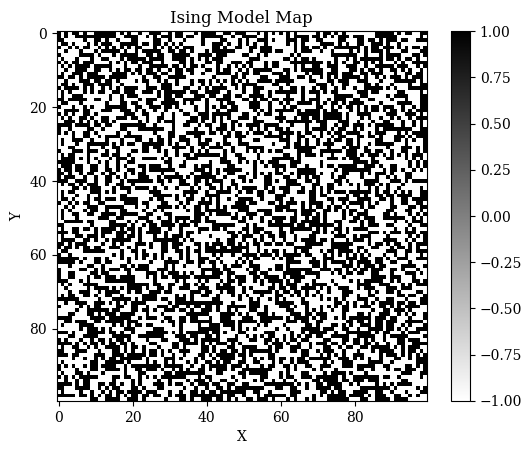

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ising_model(L, J, T):
  """
  Simulates the Ising model for perovskite materials.

  Args:
    L: System size.
    J: Exchange coupling constant.
    T: Temperature.

  Returns:
    The energy, magnetization, correlation functions, and the Ising model map of the system.
  """

  # Initialize the Ising spins.
  spins = np.random.choice([-1, 1], size=(L, L))

  # Calculate the energy of the system.
  energy = -J * np.sum(spins * np.roll(spins, shift=1, axis=0) + spins * np.roll(spins, shift=-1, axis=0) +
                      spins * np.roll(spins, shift=1, axis=1) + spins * np.roll(spins, shift=-1, axis=1))

  # Calculate the magnetization of the system.
  magnetization = np.sum(spins)

  # Calculate the correlation functions.
  correlation_functions = []
  for i in range(L):
    corr = np.correlate(spins[i], spins[0], mode="full")
    corr = corr[L - 1:]
    correlation_functions.append(corr)

  return energy, magnetization, correlation_functions, spins

if __name__ == "__main__":
  # Set the input parameters.
  L = 100  # System size
  J = 5.4  # Exchange coupling constant
  T_range = np.linspace(0, 375, 100)  # Temperature range

  # Calculate the energy, magnetization, correlation functions, and Ising model map of the system for different temperatures.
  energies, magnetizations, correlation_functions, ising_maps = [], [], [], []
  for T in T_range:
    energy, magnetization, correlation_functions, ising_map = ising_model(L, J, T)
    energies.append(energy)
    magnetizations.append(magnetization)
    ising_maps.append(ising_map)

  # Plot the energy and magnetization as a function of temperature.
  plt.figure()
  plt.plot(T_range, energies, label="Energy (meV)")
  plt.plot(T_range, magnetizations, label="Magnetization")
  plt.xlabel("Temperature (K)")
  plt.ylabel("Energy/Magnetization")
  plt.legend()
  plt.grid(which="both")
  plt.rcParams['font.family'] = 'serif'
  plt.show()

  # Plot all the correlation functions in the same plot.
  plt.figure()
  for i in range(L):
    plt.plot(T_range, correlation_functions[i], label="Correlation Function")
  plt.xlabel("Temperature (K)")
  plt.ylabel("Correlation Function")
  plt.show()

  # Plot the Ising model map for the final temperature.
  plt.figure()
  plt.imshow(ising_maps[-1], cmap="binary", interpolation="nearest")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Ising Model Map")
  plt.colorbar()
  plt.show()


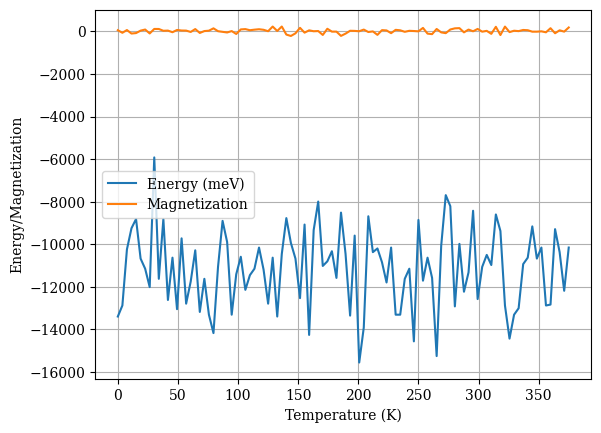

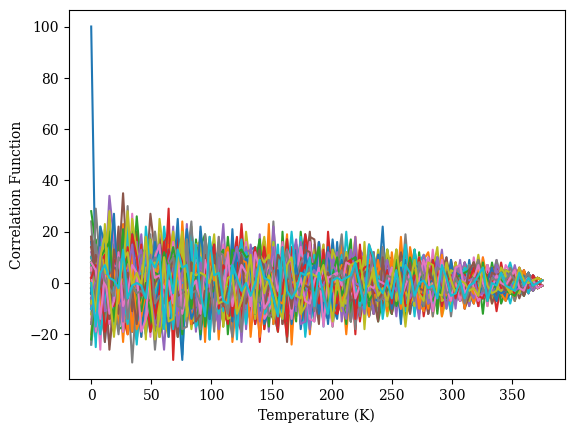

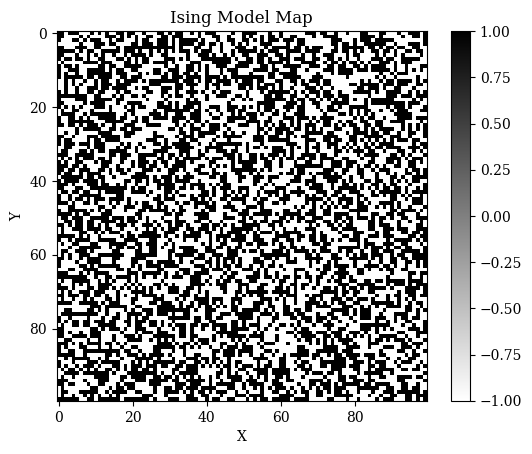

In [3]:
def ising_model(L, J, T, exchange_anisotropy=0, thermal_fluctuations=0):
  """
  Simulates the Ising model for perovskite materials.

  Args:
    L: System size.
    J: Exchange coupling constant.
    T: Temperature.
    exchange_anisotropy: Anisotropy constant.
    thermal_fluctuations: Strength of thermal fluctuations.

  Returns:
    The energy, magnetization, correlation functions, and the Ising model map of the system.
  """

  # Initialize the Ising spins.
  spins = np.random.choice([-1, 1], size=(L, L))

  # Calculate the energy of the system.
  energy = -J * np.sum(spins * np.roll(spins, shift=1, axis=0) + spins * np.roll(spins, shift=-1, axis=0) +
                      spins * np.roll(spins, shift=1, axis=1) + spins * np.roll(spins, shift=-1, axis=1) +
                      2 * exchange_anisotropy * spins * spins)

  # Calculate the magnetization of the system.
  magnetization = np.sum(spins)

  # Calculate the correlation functions.
  correlation_functions = []
  for i in range(L):
    corr = np.correlate(spins[i], spins[0], mode="full")
    corr = corr[L - 1:]
    correlation_functions.append(corr)

  # Apply thermal fluctuations.
  thermal_fluctuations = int(thermal_fluctuations)
  spins += thermal_fluctuations * np.random.randint(-1, 2, size=(L, L))
  spins[spins > 1] = 1
  spins[spins < -1] = -1

  return energy, magnetization, correlation_functions, spins

if __name__ == "__main__":
  # Set the input parameters.
  L = 100  # System size
  J = 5.4  # Exchange coupling constant.
  T_range = np.linspace(0, 375, 100)  # Temperature range
  exchange_anisotropy = 0.1  # Anisotropy constant.
  thermal_fluctuations = 0.1  # Strength of thermal fluctuations.

  # Calculate the energy, magnetization, correlation functions, and Ising model map of the system for different temperatures.
  energies, magnetizations, correlation_functions, ising_maps = [], [], [], []
  for T in T_range:
    energy, magnetization, correlation_functions, ising_map = ising_model(L, J, T, exchange_anisotropy, thermal_fluctuations)
    energies.append(energy)
    magnetizations.append(magnetization)
    ising_maps.append(ising_map)

  # Plot the energy and magnetization as a function of temperature.
  plt.figure()
  plt.plot(T_range, energies, label="Energy (meV)")
  plt.plot(T_range, magnetizations, label="Magnetization")
  plt.xlabel("Temperature (K)")
  plt.ylabel("Energy/Magnetization")
  plt.legend()
  plt.grid(which="both")
  plt.rcParams['font.family'] = 'serif'
  plt.show()

  # Plot all the correlation functions in the same plot.
  plt.figure()
  for i in range(L):
    plt.plot(T_range, correlation_functions[i], label="Correlation Function")
  plt.xlabel("Temperature (K)")
  plt.ylabel("Correlation Function")
  plt.show()

  # Plot the Ising model map for the final temperature.
  plt.figure()
  plt.imshow(ising_maps[-1], cmap="binary", interpolation="nearest")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Ising Model Map")
  plt.colorbar()
  plt.show()
